# 0. Preparation (API call, data sorting & re-indexing)

In [52]:
import pandas as pd
from sodapy import Socrata

client = Socrata("data.cms.gov", None)

# All results, returned as JSON from API / converted to Python list of dictionaries by sodapy.
results = client.get("s2uc-8wxp", limit=999999)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [96]:
# Assign the original data to a variable for future manipulation
df = results_df

In [97]:
# Extract NY state data
df = df[df["provider_state"] == "NY"]

In [98]:
# Convert week_ending's data type to datime
df["week_ending"] = df["week_ending"].astype("datetime64")
# Sort the data by time
df.sort_values(by = "week_ending")

<ipython-input-98-dc4aee60a6a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["week_ending"] = df["week_ending"].astype("datetime64")


,week_ending,federal_provider_number,provider_name,provider_address,provider_city,provider_state,provider_zip_code,submitted_data,county,geolocation,...,has_facility_performed_staff_and_or_personnel_tests_since_last_report,tested_staff_and_or_personnel_with_new_signs_or_symptoms,tested_asymptomatic_staff_and_or_personnel_in_a_unit_or_section_after_a_new_case,tested_asymptomatic_staff_and_or_personnel_facility_wide_after_a_new_case,tested_asymptomatic_staff_and_or_personnel_without_known_exposure_as_surveillance,tested_another_subgroup_of_staff_and_or_personnel,number_of_ventilators_in,number_of_ventilators_in_1,any_current_supply_of,one_week_supply_of_ventilator
137519,2020-05-24,335677,SHEEPSHEAD NURSING & REHABILITATION CENTER,2840 KNAPP ST,BROOKLYN,NY,11235,Y,Kings,"{'type': 'Point', 'coordinates': [-73.931321, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125278,2020-05-24,335098,FINGER LAKES HEALTH,196-198 NORTH STREET,GENEVA,NY,14456,Y,Ontario,"{'type': 'Point', 'coordinates': [-76.987954, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122965,2020-05-24,335080,REGENCY EXTENDED CARE CENTER,65 ASHBURTON AVENUE,YONKERS,NY,10701,Y,Westchester,"{'type': 'Point', 'coordinates': [-73.894891, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,10,0,Y,Y
134809,2020-05-24,335820,REGAL HEIGHTS REHABILITATION AND HEALTH CARE CTR,70-05 35 AVENUE,JACKSON HEIGHTS,NY,11372,Y,Queens,"{'type': 'Point', 'coordinates': [-73.895441, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142302,2020-05-24,335844,THE KNOLLS,55 GRASSLAND ROAD,VALHALLA,NY,10595,Y,Westchester,"{'type': 'Point', 'coordinates': [-73.816524, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140850,2020-08-30,335618,LATTA ROAD NURSING HOME EAST,2102 LATTA ROAD,ROCHESTER,NY,14612,Y,Monroe,"{'type': 'Point', 'coordinates': [-77.669413, ...",...,Y,N,N,N,Y,N,NaN,NaN,NaN,NaN
140852,2020-08-30,335771,THROGS NECK REHABILITATION & NURSING CENTER,707 THROGS NECK EXPRESSWAY,BRONX,NY,10465,Y,Bronx,"{'type': 'Point', 'coordinates': [-73.818794, ...",...,Y,Y,N,Y,N,N,NaN,NaN,NaN,NaN
128858,2020-08-30,335046,NORTHERN MANOR GERIATRIC CENTER INC,199 N MIDDLETOWN ROAD,NANUET,NY,10954,Y,Rockland,"{'type': 'Point', 'coordinates': [-74.010866, ...",...,Y,N,N,N,Y,N,25,0,Y,Y
140694,2020-08-30,335734,"FRIEDWALD CENTER FOR REHAB AND NURSING, L L C",475 NEW HEMPSTEAD ROAD,NEW CITY,NY,10956,Y,Rockland,"{'type': 'Point', 'coordinates': [-74.029994, ...",...,Y,N,N,N,Y,N,18,0,Y,Y


# 1. Problems with Critical Supplies

## a. Ventilators
### I. How many nursing homes in the state of NY are equipped with ventilators?

<AxesSubplot:title={'center':'Number of Nursing Homes equipped with Ventilators in the state of NY'}, xlabel='Week Ending', ylabel='Number of Nursing Homes'>

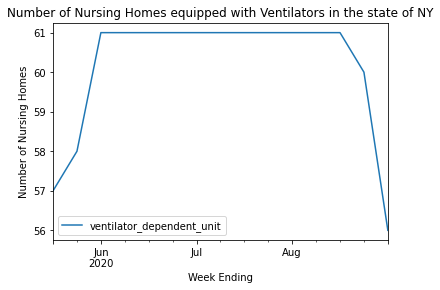

In [114]:
# Pin down the nursing homes with Ventilators
mask1 = df["ventilator_dependent_unit"] == "Y"
# How the number of nursing homes equiped with Ventilators changed in the past few months (in the state of NY)
nursinghome_with_ventilator = df[mask1].pivot_table(values = "ventilator_dependent_unit", index = "week_ending", aggfunc = "count")
# Plot the graph
nursinghome_with_ventilator.plot(title = "Number of Nursing Homes equipped with Ventilators in the state of NY", xlabel = "Week Ending", ylabel = "Number of Nursing Homes")

### II. How many ventilators are there? How many per 1000 patient?

<ipython-input-112-73f18dfd68d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["number_of_ventilators_in"] = df["number_of_ventilators_in"].fillna(0).astype(float)


<AxesSubplot:title={'center':'Total Number of Ventilators in the state of NY'}, xlabel='Week Ending', ylabel='Number of Ventilators'>

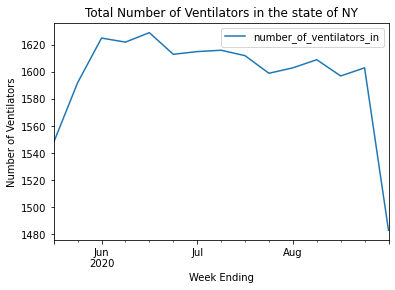

In [112]:
# Find out how the total number of Ventilators in the state of NY has changed 
df["number_of_ventilators_in"] = df["number_of_ventilators_in"].fillna(0).astype(float)
# Construct the Pivot table
ventilator_number = df.pivot_table(values = "number_of_ventilators_in", index = "week_ending", aggfunc = "sum")
# Plot the graph
ventilator_number.plot(title = "Total Number of Ventilators in the state of NY", xlabel = "Week Ending", ylabel = "Number of Ventilators")

### III. Is there enough follow-up supplies?

<AxesSubplot:xlabel='week_ending'>

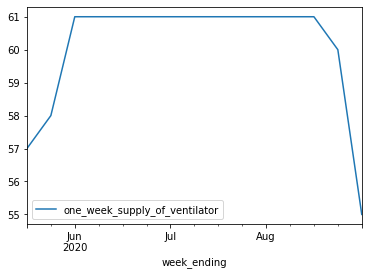

In [107]:
mask2 = df["one_week_supply_of_ventilator"] == "Y"
df[mask2].pivot_table(values = "one_week_supply_of_ventilator", index = "week_ending", aggfunc = "count").plot()

## b. PPEs (N95 masks, Surgical masks, Eye protection, Gowns, Gloves, Hand sanitizer)

# 2. Problem with Staff Infection